# Oblig 2.

## MAT4110

### John-Magnus Johnsen

##### Thursday 23. october 2025

When using *Singular Value Decomposition* (*SVD*) to compress a grayscale image, we first must turn the image into a matrix where the elements corresponds to the pixels. The values of these elements will for a grayscale image range from 0 to 255, representing the intensity for each pixel, from black (0) to white (255). An image of hight $m$ and width $n$ pixels, become an $(m \times n)$ matrix. Since each element of the matrix is a number between 0 and 255, we need to allocate 8 *bits* of storage per element, $256 = 2^8$, this is also called a *byte*. Then for an $(m \times n)$ image, there would be, $s = mn$ elements in total, needing $s$ *bytes* of storage. The point of compression is to reduce the amount of storage space needed, without effecting the visual appearance too much.

If $\boldsymbol{A}$ is an $(m \times n)$ matrix as described above, it's also customary to normalize the element values by scaling them as fractions of 255, turning them from an integer to a floating-point number for numerical stability. And they would have to be turn into floating-point numbers anyway when performing the decomposition. This is an important point because the *SVD* of a matrix $\boldsymbol{A}$ with shape $(m \times n)$ yield the matrices $\boldsymbol{USV}^T$, where there shapes are $(m \times m)(m \times n)(n \times n)$ respectively. All of the three resulting matrices from the decomposition uses double floating point precision, 64-bit floating point, as standard. Or said in other terms, each element then takes up $8$ *bytes*, which is eight times the size each element in the original image use. This means that we now have a lot more elements to store and also each element take up 8 times the space. But, by using only the first $r$ singular values in $S$ we could get a favorable result in terms of final storage space needed. This is because slicing away most of the singular values by choosing only the $r$ first values, the shape of $\boldsymbol{USV}^T$ becomes $(m \times r)(r \times r)(r \times n)$.  On the contrary, if we don't choose $r$ small enough the new image will take up more storage space than the original one, defying the purpose of the compression. We also see that the resolution of the original image is preserved with this style of compression.

Since $\boldsymbol{S}$ is a diagonal matrix we simply need to store: $r \cdot 8$ bytes. Then the total storage space needed is: $(mr + r + rn) \cdot 8 \, \text{bytes}$, and an upper bound for $r$ can be calculated:
$$
\left( mr + r + rn \right) \cdot 8 \, \text{bytes} < mn \, \text{bytes}
$$

$$
\left( m + 1 + n \right)r \cdot 8 < mn
$$

$$
r < \frac{mn}{8(m + n + 1)}
$$

By only using the $r$ first singular values, we essentially cut of the: $n - r$ last columns of $\boldsymbol{U}$, and the: $m - r$ last rows of $\boldsymbol{V}^T$. To illustrate that this does not necessarily mean the end of the world, we will see that for certain images most of the information in $\boldsymbol{U}$ is stored in the first few columns, and most of the information in $\boldsymbol{V}^T$ is stored in the first few rows.

We can also define a compression ratio as:

$$
\frac{\text{uncompressed size}}{\text{compressed size}}= \frac{mn \, \text{byte}}{\left( mr + r + rn \right) \cdot 8 \, \text{byte}} = \frac{mn}{8r(m + n + 1)}
$$

In [161]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [162]:
# Import images
img1 = cv2.imread("img1.png", cv2.IMREAD_GRAYSCALE) # Read image as matrix and convert it to grayscale, values between 0 and 255.
img2 = cv2.imread("img2.jpg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("img3.jpg", cv2.IMREAD_GRAYSCALE)

# Process images
img1 = img1.astype(np.float64)/255  # Turn entries to float numbers and normalize, now values are between 0 and 1.
img2 = img2.astype(np.float64)/255
img3 = img3.astype(np.float64)/255

In [163]:
def compress_svd_plot(img_gray_normzd, U, S, VT, r):
    """Compress normalized grayscale image using SVD using the r first singular values, then plot.
     Take img_gray_normzd and the decomposition factors U, S, VT, and number r.
     Plot compressed and original image next to each other.
     Return nothing."""
    
    S = np.diag(S)    # Turning 1D array S into an diagonal matrix

    # Slice away the columns of U and rows of VT, corresponding to r, such that we obtain the shapes: (m x r)(r x r)(r x n).
    # [:r] does not include r in the slicing, but since 0 is included, it keep the r first indices.
    img_comp = U[:, :r] @ S[:r, :r] @ VT[:r, :] 

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    ax1.imshow(img_comp, cmap="gray")
    ax1.axis("off")
    ax1.set_title(f"Compressed, r = {r}")
    ax2.imshow(img_gray_normzd, cmap="gray")
    ax2.axis("off")
    ax2.set_title("Original")
    plt.tight_layout()
    plt.show()
    plt.close()

def r_max(m, n):
    """Compute maximum number of singular values to be used without increasing storage size."""
    return (m*n)/(8*(m + n + 1))

def comp_ratio(m, n, r):
    """Compute compression ratio (uncompressed size)/(compressed size)."""
    return (m*n)/(8*r*(m + n + 1))

In [164]:
# SVD image 1.
U1, S1, VT1 = np.linalg.svd(img1)

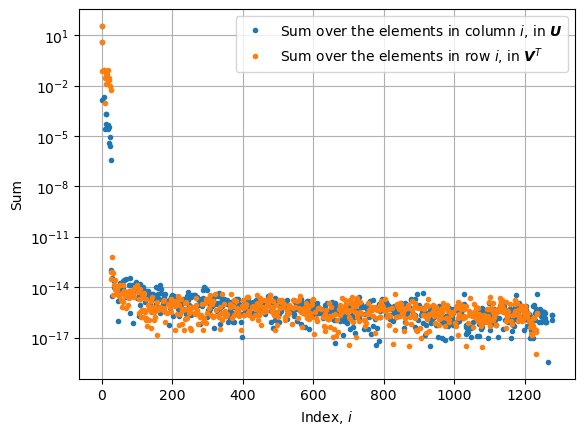

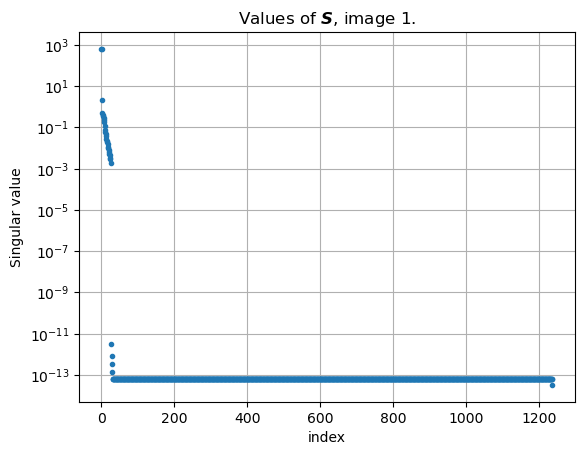

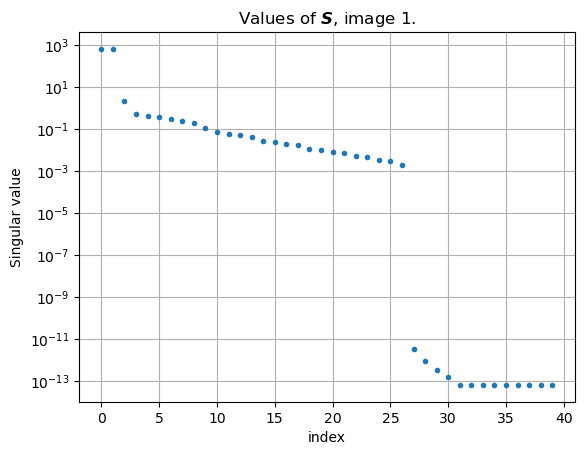

In [165]:
plt.semilogy(np.sum(U1, axis=0), ".", label=r"Sum over the elements in column $i$, in $\boldsymbol{U}$")
plt.semilogy(np.sum(VT1, axis=1), ".", label=r"Sum over the elements in row $i$, in $\boldsymbol{V}^T$")
plt.xlabel(r"Index, $i$")
plt.ylabel("Sum")
plt.title("")
plt.grid()
plt.legend()
plt.show()
plt.close()

plt.semilogy(S1, ".")
plt.xlabel("index")
plt.ylabel("Singular value")
plt.title(r"Values of $\boldsymbol{S}$, image 1.")
plt.grid()
plt.show()
plt.close()

plt.semilogy(S1[:40], ".")
plt.xlabel("index")
plt.ylabel("Singular value")
plt.title(r"Values of $\boldsymbol{S}$, image 1.")
plt.grid()
plt.show()
plt.close()

We see that most of the information in $\boldsymbol{U}$ is stored in the first few columns, and the first few rows of $\boldsymbol{V}^T$. Correspondingly there is an early drop-off in magnitude of the singular values, meaning it should be fine discarding most of them as they quickly tent towards zero. 

In [166]:
img1.shape

(1280, 1237)

In [167]:
r_max(img1.shape[0], img1.shape[1])

78.60206513105639

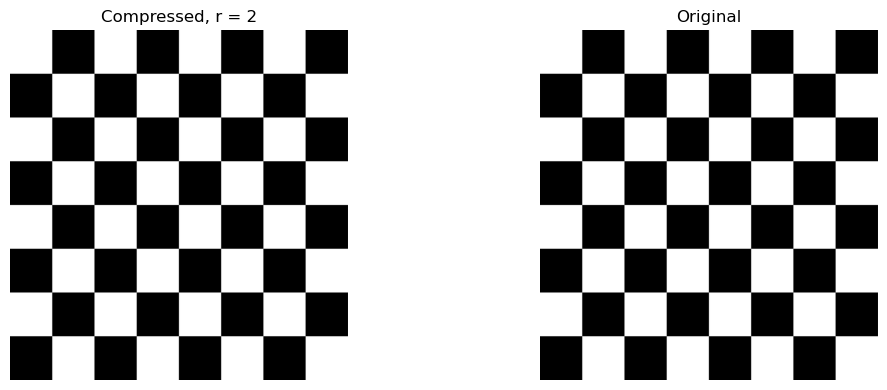

In [168]:
r = 2
compress_svd_plot(img1, U1, S1, VT1, r)

In [169]:
comp_ratio(img1.shape[0], img1.shape[1], r)

39.301032565528196

We see that we can choose an $r$ as low as 2, without sacrificing any quality. The compressed image also take up almost 40 times less storage space than the original, providing a large relative saving.

In [170]:
# # SVD image 2.
U2, S2, VT2 = np.linalg.svd(img2)

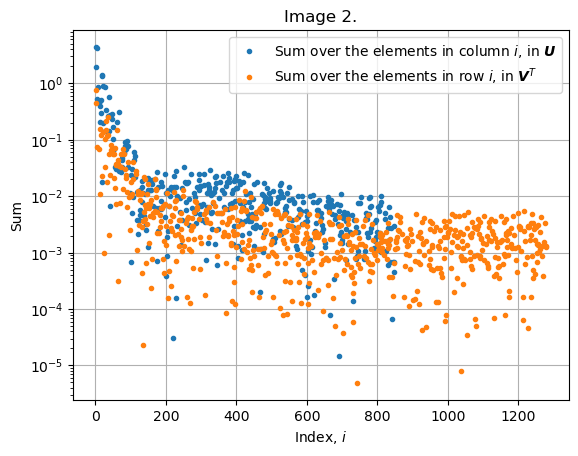

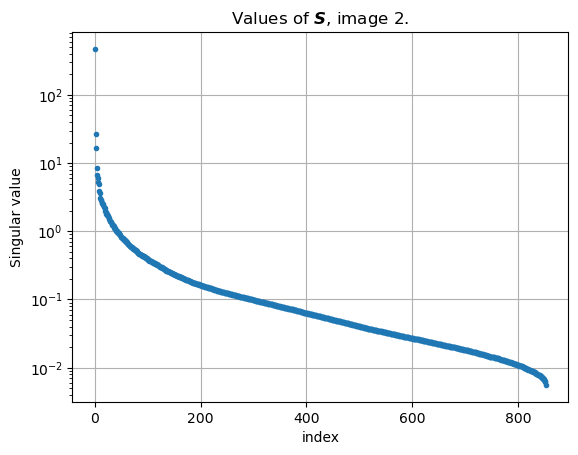

In [171]:
plt.semilogy(np.sum(U2, axis=0), ".", label=r"Sum over the elements in column $i$, in $\boldsymbol{U}$")
plt.semilogy(np.sum(VT2, axis=1), ".", label=r"Sum over the elements in row $i$, in $\boldsymbol{V}^T$")
plt.xlabel(r"Index, $i$")
plt.ylabel("Sum")
plt.title("Image 2.")
plt.grid()
plt.legend()
plt.show()
plt.close()

plt.semilogy(S2, ".")
plt.xlabel("index")
plt.ylabel("Singular value")
plt.title(r"Values of $\boldsymbol{S}$, image 2.")
plt.grid()
plt.show()
plt.close()

For image 2., as for image 1, we see an initial drop-off in the magnitude of the singular values, but then they decrease much more gradually. This presumably is due to the increased image complexity. The columns of $\boldsymbol{U}$, and rows of $\boldsymbol{V}^T$ also contain values of far larger magnitude.

In [172]:
img2.shape

(854, 1280)

In [173]:
r_max(img2.shape[0], img2.shape[1])

64.0

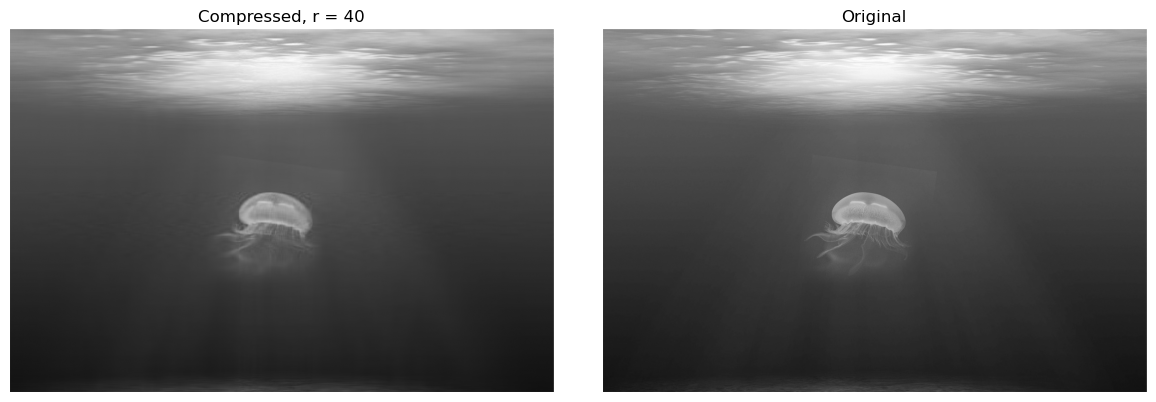

In [174]:
r = 40
compress_svd_plot(img2, U2, S2, VT2, r)

In [175]:
comp_ratio(img2.shape[0], img2.shape[1], r)

1.6

Choosing $r = 40$ we get an acceptable image, and use only $1.6^{-1} = 62.5 \%$ of original space, saving $37.5 \%$.

In [176]:
# SVD image 3.
U3, S3, VT3 = np.linalg.svd(img3)

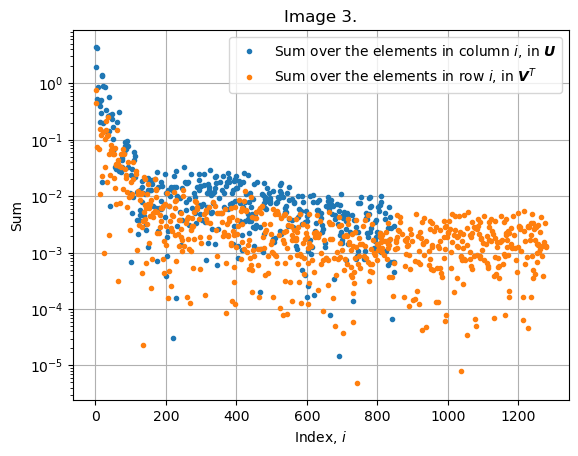

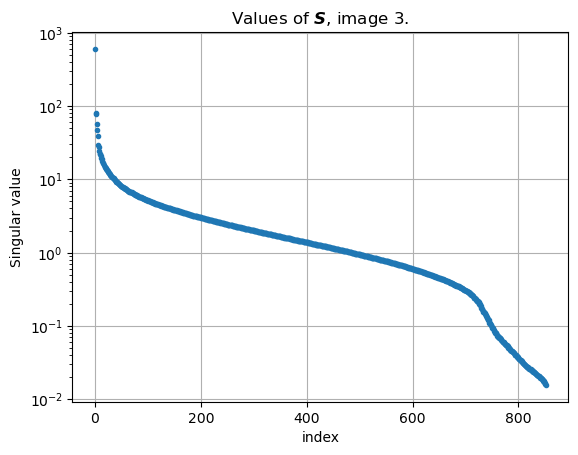

In [177]:
plt.semilogy(np.sum(U2, axis=0), ".", label=r"Sum over the elements in column $i$, in $\boldsymbol{U}$")
plt.semilogy(np.sum(VT2, axis=1), ".", label=r"Sum over the elements in row $i$, in $\boldsymbol{V}^T$")
plt.xlabel(r"Index, $i$")
plt.ylabel("Sum")
plt.title("Image 3.")
plt.grid()
plt.legend()
plt.show()
plt.close()

plt.semilogy(S3, ".")
plt.xlabel("index")
plt.ylabel("Singular value")
plt.title(r"Values of $\boldsymbol{S}$, image 3.")
plt.grid()
plt.show()
plt.close()

For image 3. we see similar characteristics as for image 2. concerning $\boldsymbol{U}$ and $\boldsymbol{V}^T$. The singular values are though roughly an order of magnitude greater.  

In [178]:
img3.shape

(853, 1280)

In [179]:
r_max(img3.shape[0], img3.shape[1])

63.95501405810684

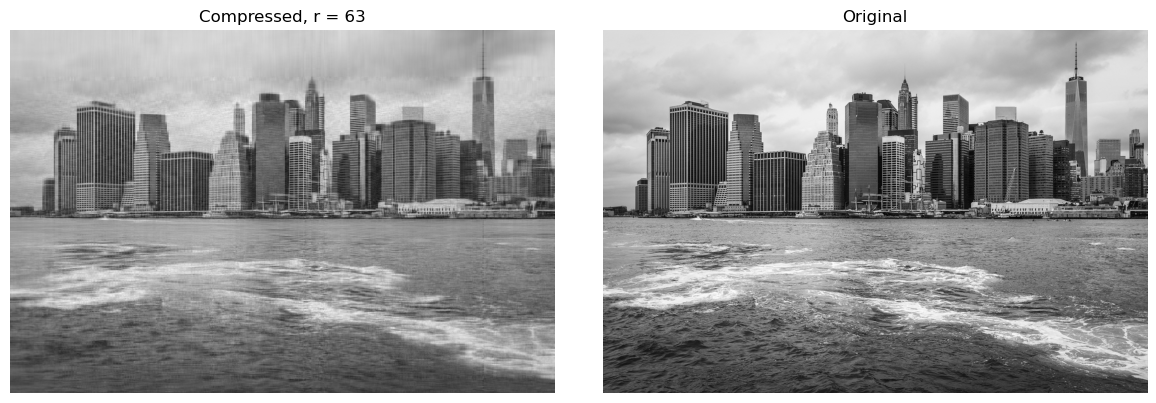

In [180]:
r = 63
compress_svd_plot(img3, U3, S3, VT3, r)

In [181]:
comp_ratio(img3.shape[0], img3.shape[1], r)

1.0151589533032832

As we partially saw for image 2, the complexity of image 3. makes it a lot more difficult to compress. To retain an acceptable image quality we must choose a quite large $r$, and doing so the compression ratio approaches $1$, meaning there is only a small reduction in storage size compared to the original image. Even using the upper bound of singular values, the image clearly shows signs of reduced quality appearing grainy. Therefore there might be other compression strategies better suited for detailed rich images like this. Also, the upper bound of $r$ is determined by the shape of the original image only, without taking the any other parameter into account, like the composition of the image. However, for the simpler cases of recurring elements with clearly defined borders and intensities, like the chessboard in image 1, the *SVD* compression works very well. It's also possible to reduce the amount of space that each element use when stored as floating points by for instance changing from 64-bit to the 32-bit floating point at the expense of precision.